# Summary

This notebook is broken into 4 main sections: Word Clouds, Topic Modeling Preprocessing, Topic Modeling, and Rule-Based Classification.

The Word Cloud section produced some interesting results, and I've included some methods for tinkering with the images. The Topic Modeling Preprocessing deals with a lot of technical information. If you would like further explanation on any of it, please let me know. The Topic Modeling section produced mixed results. It was more useful for some questions than others. Overall, there needs to be a lot more digging into that section. Your domain knowledge in this field will come in handy. The Rule-Based Classification section was very interesting and technically straightforward. You can use the classifier to extract other information by changing the keywords list.

Again, if there is anything you would like further clarification on, please don't hesitate to ask. Thank you.

In [0]:
# install pyldavis to visualize topics
!pip install pyldavis

In [0]:
# imports
import re
import numpy as np
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# pandas options
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('max_colwidth', 1000)

/usr/local/lib/python3.6/dist-packages/_pytest/mark/structures.py:426: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
# read in data, drop extra column
df = pd.read_excel('Text_Data_Updated.xlsx')
df = df.drop(columns=['Unnamed: 0'])

Below the dataframe is being filtered down to Class 4 and 5 because those are the most informative responses.

In [0]:
# reduce dataframe to class 4 and 5
df = df[df['Class'] >= 4]

# Word Clouds

In this section, we'll produce a word cloud for each question. I start out with initial results and then show how to modify the word clouds for possibly more interesting results.

First, we'll get the text from the dataframes. We'll also use the stopwords method from the wordcloud library just in case there need to be more removal of stopwords.

In [0]:
# here we join all the responses into one large string of text
wordcloud_text1 = " ".join(response for response in df[df['Question'] == 1]['Response_Cleaned'])
wordcloud_text2 = " ".join(response for response in df[df['Question'] == 2]['Response_Cleaned'])
wordcloud_text3 = " ".join(response for response in df[df['Question'] == 3]['Response_Cleaned'])
wordcloud_text4 = " ".join(response for response in df[df['Question'] == 4]['Response_Cleaned'])
wordcloud_text5 = " ".join(response for response in df[df['Question'] == 5]['Response_Cleaned'])

# make stopwords instance
stopwords = set(STOPWORDS)

### Initial Results

Now let's begin to plot the results. You'll notice that the results can be somewhat difficult to see. I've tried to play with the parameters but have had little success blowing the image up in a notebook. I've include a line (plt.savefig("q1.png", format="png") for each plot to save the image. You could then blow it up in PowerPoint or a word editor. Just uncomment the line and run the cell to save. Also you can play with the min_font_size parameter. Making this smaller will include more words but they'll be harder to see.

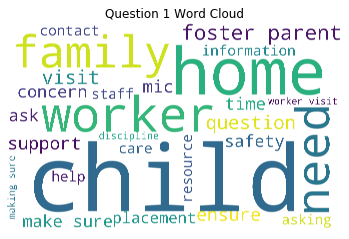

In [0]:
# make word cloud instance
wordcloud1 = WordCloud(width=800, height=500, stopwords=stopwords, scale=20, min_font_size=23, background_color='white').generate(wordcloud_text1)

# plot word cloud for question 1
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Question 1 Word Cloud')
# plt.savefig("q1.png", format="png")
plt.show()

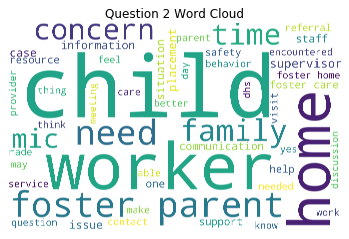

In [0]:
# make word cloud instance
wordcloud2 = WordCloud(width=800, height=500, stopwords=stopwords, scale=20, min_font_size=23, background_color='white').generate(wordcloud_text2)

# plot word cloud for question 2
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title('Question 2 Word Cloud')
# plt.savefig("q2.png", format="png")
plt.show()

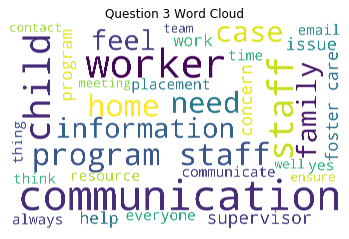

In [0]:
# make word cloud instance
wordcloud3 = WordCloud(width=800, height=500, stopwords=stopwords, scale=20, min_font_size=23, background_color='white').generate(wordcloud_text3)

# plot word cloud for question 3
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.title('Question 3 Word Cloud')
# plt.savefig("q3.png", format="png")
plt.show()

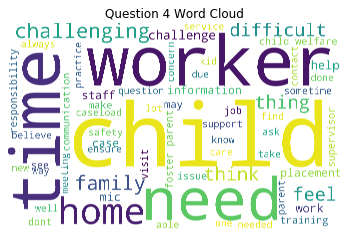

In [0]:
# make word cloud instance
wordcloud4 = WordCloud(width=800, height=500, stopwords=stopwords, scale=20, min_font_size=23, background_color='white').generate(wordcloud_text4)

# plot word cloud for question 4
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.title('Question 4 Word Cloud')
# plt.savefig("q4.png", format="png")
plt.show()

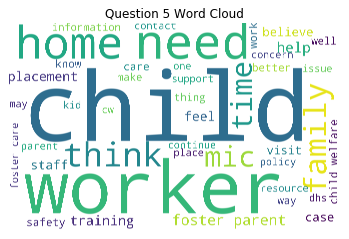

In [0]:
# make word cloud instance
wordcloud5 = WordCloud(width=800, height=500, stopwords=stopwords, scale=20, min_font_size=23, background_color='white').generate(wordcloud_text5)

# plot word cloud for question 5
plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis('off')
plt.title('Question 5 Word Cloud')
# plt.savefig("q5.png", format="png")
plt.show()

From the initial results, you'll notice that there is a lot of similarity between the questions. For example, "child", "worker", "need", etc. are usually the most mentioned words in all but question 3. To dig in and find more distinction between the questions, we could exclude the most common words by updating the stopwords. Now let's update the results.

### Updated Results

In [0]:
# make stopwords instance
stopwords = set(STOPWORDS)

# update stopwords to remove common words -- update the list below to tinker with the following results
stopwords.update(["child", "worker", "home", "need"])

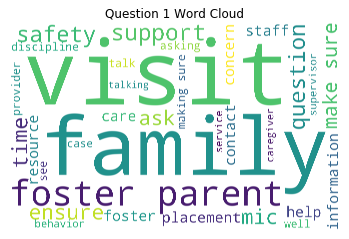

In [0]:
# make word cloud instance
wordcloud1 = WordCloud(width=800, height=500, stopwords=stopwords, scale=20, min_font_size=23, background_color='white').generate(wordcloud_text1)

# plot word cloud for question 1
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Question 1 Word Cloud')
# plt.savefig("q1.png", format="png")
plt.show()

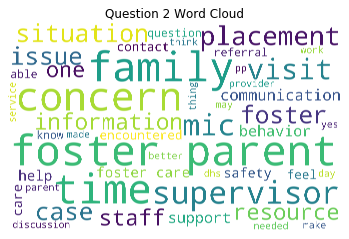

In [0]:
# make word cloud instance
wordcloud2 = WordCloud(width=800, height=500, stopwords=stopwords, scale=20, min_font_size=23, background_color='white').generate(wordcloud_text2)

# plot word cloud for question 2
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title('Question 2 Word Cloud')
# plt.savefig("q2.png", format="png")
plt.show()

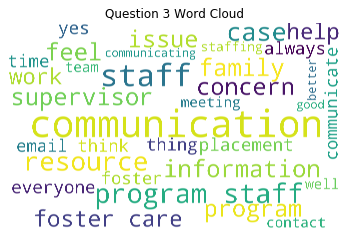

In [0]:
# make word cloud instance
wordcloud3 = WordCloud(width=800, height=500, stopwords=stopwords, scale=20, min_font_size=23, background_color='white').generate(wordcloud_text3)

# plot word cloud for question 3
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.title('Question 3 Word Cloud')
# plt.savefig("q3.png", format="png")
plt.show()

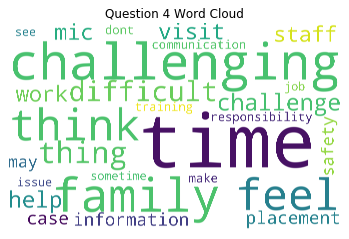

In [0]:
# make word cloud instance
wordcloud4 = WordCloud(width=800, height=500, stopwords=stopwords, scale=20, min_font_size=23, background_color='white').generate(wordcloud_text4)

# plot word cloud for question 4
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.title('Question 4 Word Cloud')
# plt.savefig("q4.png", format="png")
plt.show()

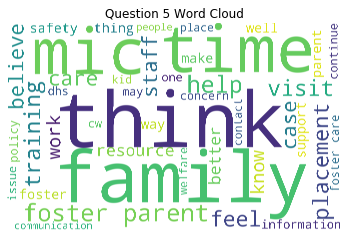

In [0]:
# make word cloud instance
wordcloud5 = WordCloud(width=800, height=500, stopwords=stopwords, scale=20, min_font_size=23, background_color='white').generate(wordcloud_text5)

# plot word cloud for question 5
plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis('off')
plt.title('Question 5 Word Cloud')
# plt.savefig("q5.png", format="png")
plt.show()

Now we can see much more distinction between each question.

# Topic Modeling Preprocessing

Below is a simple function that tokenizes the Response_Cleaned column (i.e. breaks responses into list of comma separated words). We do this so we can look at each word individually for preprocessing.

In [0]:
# make simple tokenize function
def tokenize(response):
  return response.split()

# apply above function to dataframe
df['Response_Cleaned'] = df['Response_Cleaned'].apply(tokenize)

Now we'll split the dataframe above into 5 separate dataframes so we can look at each question individually.

In [0]:
# make subset dataframes
q1 = df[df['Question'] == 1].reset_index(drop=True)
q2 = df[df['Question'] == 2].reset_index(drop=True)
q3 = df[df['Question'] == 3].reset_index(drop=True)
q4 = df[df['Question'] == 4].reset_index(drop=True)
q5 = df[df['Question'] == 5].reset_index(drop=True)

We'll now convert the Response_Cleaned columns of each subset dataframe into lists. These lists will be used in the Topic Modeling algorithms.

In [0]:
# turn response cleaned columns into lists
q1_list = q1['Response_Cleaned'].tolist()
q2_list = q2['Response_Cleaned'].tolist()
q3_list = q3['Response_Cleaned'].tolist()
q4_list = q4['Response_Cleaned'].tolist()
q5_list = q5['Response_Cleaned'].tolist()

Below we'll use the make_bigrams function to look for 2 words that commonly appear together. This will allow our model to interpret these 2 separate words as one word. For example, because "permanency" and "planning" appear often together, those 2 words become "permanency_planning" when they appear next to each other in a response.

In [0]:
def make_bigrams(q_list, min_count=5, threshold=100):
  # make bigram instance with Phrases model from gensim
  bigram = gensim.models.Phrases(q_list, min_count=min_count, threshold=threshold)

  # pass bigram instance to Phraser model
  bigram_mod = gensim.models.phrases.Phraser(bigram)

  # return updated response list with bigrams included
  return [bigram_mod[response] for response in q_list]


# apply make_bigrams function to update response lists
q1_list = make_bigrams(q1_list)
q2_list = make_bigrams(q2_list)
q3_list = make_bigrams(q3_list)
q4_list = make_bigrams(q4_list)
q5_list = make_bigrams(q5_list)

Below is a function that lemmatizes each word in a response. Lemmatization reduces the word to its most basic form. For example, "troubling" will be reduced to "trouble", "communications" will be reduced to "communication" and so on. You'll remember that we did this in Part I of the analysis, but this time I'm using spacy's lemmatization method, which is slightly more comprehensive.

In [0]:
# make spacy instance to use the spacy lemmatizer
nlp = spacy.load('en', disable=['parser', 'ner'])

# make lemmatization function -- only apply lemmatization to specific parts of speech (allowed_postags)
def lemmatization(q_list, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    # make list to hold lemmatized responses
    responses_out = []

    # start for loop to loop through all responses in the question lists
    for response in q_list:

        # join the responses (i.e. de-tokenize) so we can feed to spacy's lemmatizer
        doc = nlp(" ".join(response))

        # append responses_out list with lemmatized responses 
        responses_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

    return responses_out

# apply lemmatization funtion to update response lists
q1_list = lemmatization(q1_list)
q2_list = lemmatization(q2_list)
q3_list = lemmatization(q3_list)
q4_list = lemmatization(q4_list)
q5_list = lemmatization(q5_list)

Below is a function to create the 2 essential inputs for a topic model, the corpus and dictionary.

In [0]:
# function to make corpus and dictionary for each question
def make_corpus_dict(q_list):

  # create dictionary
  id2word = corpora.Dictionary(q_list)

  # create corpus -- Term Document Frequency
  corpus = [id2word.doc2bow(response) for response in q_list]

  return id2word, corpus

# apply above function to each list of responses
id2word1, corpus1 = make_corpus_dict(q1_list)
id2word2, corpus2 = make_corpus_dict(q2_list)
id2word3, corpus3 = make_corpus_dict(q3_list)
id2word4, corpus4 = make_corpus_dict(q4_list)
id2word5, corpus5 = make_corpus_dict(q5_list)

The corpus assigns a unique number to every word in the question list, then counts how many times that word appears in a response. Below is what the corpus looks like for the fifth response in the question 5 list. The number on the left is the unique word id, and the number on the right is how many times it appears in the response.

In [0]:
print(corpus5[5])

[(4, 1), (7, 2), (26, 1), (27, 1), (43, 1), (98, 1), (106, 1), (110, 1), (111, 2), (112, 1), (113, 1), (114, 1), (115, 1), (116, 1), (117, 1), (118, 1), (119, 1), (120, 1), (121, 1), (122, 1), (123, 1)]


You'll notice that word 7 appears twice in the fifth response. Let's see what that word is by using the dictionary.

In [0]:
id2word5[7]

'child'

Now that we've done all the preprocessing and created the corpus and dictionary, let's build the model and find out how many topics we should use for each question. To do this, we'll use gensim's LdaModel (i.e. Latent Dirichlet Allocation Model). The LdaModel is the most widely used model for Topic Modeling.

To learn more about how this model works, check out this informative article:
https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d

To find the optimal number of topics, we'll use the function below to create a bunch of models (each model uses a different number of topics) and see which model has the best coherence value. Basically, the coherence value measures the quality of the model.

To learn more about the coherence value, check out this article:
https://rare-technologies.com/what-is-topic-coherence/

In [0]:
# function to compute coherence values for many topics --  we'll find the optimal topic number by finding the best coherence value
# this function requires the dictionary (id2word), corpus, & question list (all created above), and a start, step and limit of number of topics
def compute_coherence_values(id2word, corpus, q_list, limit, start=2, step=1):

    # list to store coherence values
    coherence_values = []

    # list to store model objects
    model_list = []

    # start for loop to pass number of topics to LDA model
    for num_topics in range(start, limit, step):

        # create LDA model instance with num_topics parameter
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics, 
                                            random_state=42,
                                            update_every=1,
                                            chunksize=100, 
                                            passes=10, 
                                            alpha='auto',
                                            per_word_topics=True)
        # append model object to model list
        model_list.append(lda_model)

        # create coherence model instance
        coherencemodel = CoherenceModel(model=lda_model, texts=q_list, dictionary=id2word, coherence='c_v')

        # append coherence value to coherence value list
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

Below we'll apply the above function to each question list. You'll notice we're starting with 2 topics and then counting (stepping) up by one, and we're limited to 15 topics.

#### Note: The cell below will take 3-4 minutes to compute.

In [0]:
# apply function above to each question list
model_list1, coherence_values1 = compute_coherence_values(id2word=id2word1, corpus=corpus1, q_list=q1_list, start=2, limit=20, step=1)
model_list2, coherence_values2 = compute_coherence_values(id2word=id2word2, corpus=corpus2, q_list=q2_list, start=2, limit=20, step=1)
model_list3, coherence_values3 = compute_coherence_values(id2word=id2word3, corpus=corpus3, q_list=q3_list, start=2, limit=20, step=1)
model_list4, coherence_values4 = compute_coherence_values(id2word=id2word4, corpus=corpus4, q_list=q4_list, start=2, limit=20, step=1)
model_list5, coherence_values5 = compute_coherence_values(id2word=id2word5, corpus=corpus5, q_list=q5_list, start=2, limit=20, step=1)

Now let's plot the coherence values for each question. The high point of the plot will indicate how many topics we should choose for each question.

Below is the coherence values for question 1. It looks like the optimal topic number is 16.

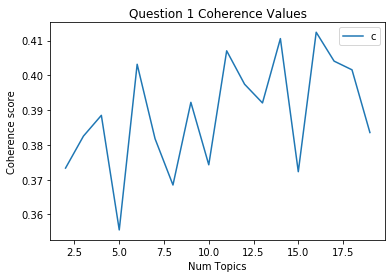

In [0]:
# graph coherence values for question 1
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values1)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title('Question 1 Coherence Values')
plt.legend(("coherence_values"), loc='best')
plt.show()

Below is the coherence values for question 2. It looks like the optimal topic number is 7.

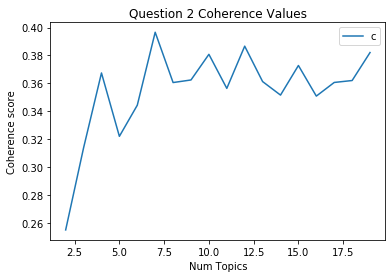

In [0]:
# graph coherence values for question 2
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title('Question 2 Coherence Values')
plt.legend(("coherence_values"), loc='best')
plt.show()

Below is the coherence values for question 3. It looks like the optimal topic number is 6.

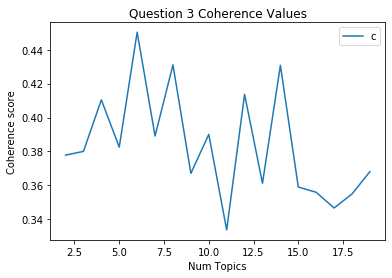

In [0]:
# graph coherence values for question 3
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values3)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title('Question 3 Coherence Values')
plt.legend(("coherence_values"), loc='best')
plt.show()

Below is the coherence values for question 4. It looks like the optimal topic number is 5.

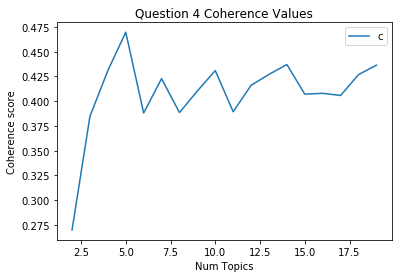

In [0]:
# graph coherence values for question 4
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values4)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title('Question 4 Coherence Values')
plt.legend(("coherence_values"), loc='best')
plt.show()

Below is the coherence values for question 5. It looks like the optimal topic number is 8.

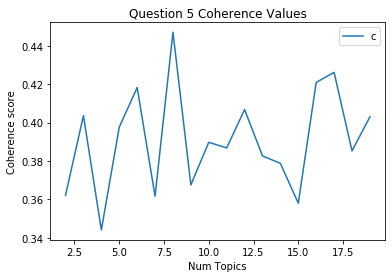

In [0]:
# graph coherence values for question 5
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values5)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title('Question 5 Coherence Values')
plt.legend(("coherence_values"), loc='best')
plt.show()

Now that we know the optimal number of topics for each question, let's make the models with those topic numbers.

# Topic Modeling

### Question 1 Topic Model


Below we'll make the question one model with the optimal number of topics, 16.

In [0]:
lda_model1 = gensim.models.ldamodel.LdaModel(corpus=corpus1,
                                            id2word=id2word1,
                                            num_topics=16, 
                                            random_state=42,
                                            update_every=1,
                                            chunksize=100, 
                                            passes=10, 
                                            alpha='auto',
                                            per_word_topics=True)

Below we'll use a visualization tool (LDAvis) to help us better understand the topics. It may take a minute or 2 to load.

#### LDAvis Explanation

There's a lot going on with this visualization, so let's go over some of the features. On the left side of the visualization, you'll see circles on a plot with x and y axes. Don't worry too much about the meaning of these axes. We talked a bit about dimensionality reduction for the sake of visualization in the first part of the analysis (LSA & PCA). That's what's going on here. Each circle represents a topic, and the size of the circles represent how many responses fall into each topic. The larger the circle, the more responses that topic has.

What we would typically like to see from the left plot is large(ish) circles that minimally overlap. Most of these topics are decent in size and, although there is some overlap between topics, the overlap is not a major issue.

If you hover over the circles (topics) you'll see the bar chart on the right side update. These bars represent the words that comprise each topic. The red bar is the number of times a word appears in that topic, and the blue bar is the number of times the words appears overall. So, we're seeing how frequently a word appears in a topic vs. how frequently the word appears overall. If we want to see words more/less unique to the topic in question, we'll use the slider in the top right of the visualization. To see words more unique to topic 11 (the largest topic), first click on the topic 11 circle. Now slide the slider all the way to the left. You'll see the words update. You will also see the difference between the red and blue bars decrease because those words primarily appear in topic 11. Now we see words like "pay", "close", "attention", "question", "talk", "know", "observe". It seems like these respondents are being more attentive during home visits.

Take some time to look through each topic to determine if they are meaningful. Again, because this is an unsupervised technique, some topics may be sparse, uninterpretable, or meaningless. It's going to take more human judgement to determine each topic's value.


In [0]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis1 = pyLDAvis.gensim.prepare(lda_model1, corpus1, id2word1, sort_topics=False)
vis1

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.073344  0.176025       1        1   2.328073
1     -0.038857  0.015368       2        1   3.933744
2      0.192797 -0.080833       3        1   4.540087
3      0.242004 -0.008114       4        1  13.826266
4     -0.123520 -0.059422       5        1   2.288415
5     -0.105299 -0.062316       6        1   1.644878
6     -0.020758  0.017345       7        1   2.023673
7     -0.026327  0.279109       8        1   5.158942
8     -0.091143 -0.011852       9        1   1.762553
9     -0.041087 -0.126144      10        1   2.910662
10     0.366160  0.022963      11        1  46.550907
11    -0.057206 -0.162723      12        1   2.990311
12     0.036336 -0.001981      13        1   2.658706
13    -0.040763  0.019628      14        1   3.418033
14    -0.113105  0.007139      15        1   2.224592
15    -0.105889 -0.024192      16        1   1.740160, topic_info=     Category        Freq            Term       Total  loglift  logprob
3     Default  132.000000            care  132.000000  30.0000  30.0000
48    Default  171.000000             ask  171.000000  29.0000  29.0000
12    Default  113.000000          family  113.000000  28.0000  28.0000
67    Default  329.000000            more  329.000000  27.0000  27.0000
148   Default   90.000000             mic   90.000000  26.0000  26.0000
113   Default   82.000000     information   82.000000  25.0000  25.0000
65    Default  649.000000           child  649.000000  24.0000  24.0000
25    Default  117.000000        resource  117.000000  23.0000  23.0000
11    Default  147.000000          ensure  147.000000  22.0000  22.0000
37    Default  135.000000             not  135.000000  21.0000  21.0000
22    Default  144.000000            need  144.000000  20.0000  20.0000
133   Default   78.000000      discipline   78.000000  19.0000  19.0000
23    Default  151.000000        question  151.000000  18.0000  18.0000
35    Default  273.000000            home  273.000000  17.0000  17.0000
141   Default   88.000000           staff   88.000000  16.0000  16.0000
33    Default  242.000000          foster  242.000000  15.0000  15.0000
104   Default  148.000000          safety  148.000000  14.0000  14.0000
15    Default   97.000000            help   97.000000  13.0000  13.0000
84    Default  113.000000         support  113.000000  12.0000  12.0000
18    Default  222.000000            make  222.000000  11.0000  11.0000
307   Default   32.000000             ass   32.000000  10.0000  10.0000
215   Default   54.000000              be   54.000000   9.0000   9.0000
371   Default   32.000000     communicate   32.000000   8.0000   8.0000
132   Default   71.000000            case   71.000000   7.0000   7.0000
76    Default   37.000000           learn   37.000000   6.0000   6.0000
258   Default   64.000000          review   64.000000   5.0000   5.0000
513   Default   29.000000      specialist   29.000000   4.0000   4.0000
68    Default   58.000000           place   58.000000   3.0000   3.0000
69    Default  112.000000       placement  112.000000   2.0000   2.0000
271   Default  118.000000        provider  118.000000   1.0000   1.0000
513    Topic1   28.353868      specialist   29.096449   3.7343  -2.3575
193    Topic1   24.585337         however   25.327917   3.7304  -2.5001
367    Topic1   13.632628          trauma   14.375208   3.7071  -3.0897
531    Topic1   12.799652      importance   13.542232   3.7037  -3.1528
419    Topic1   12.324621      experience   13.067201   3.7016  -3.1906
199    Topic1    8.535626             yet    9.278206   3.6767  -3.5580
388    Topic1    7.846200          engage    8.588778   3.6697  -3.6422
243    Topic1    7.143415       implement    7.885995   3.6612  -3.7360
1281   Topic1    6.292648            gain    7.035228   3.6486  -3.8628
326    Topic1    5.925197           bring    6.667777   3.6421  -3.9230
273    Topic1    5.546040        

Since these topics may require more human judgement, let's see which responses are most associated with each topic. Then we can read the responses verbatim to try and derive their meaning.

We'll use the function below to update the question dataframes to include the topic number and percentage contribution. The percentage contribution is a number that measures how well a response fits into that topic. The higher the percent, the more confident we are that the response fits into that topic.

In [0]:
def update_df_with_topic(ldamodel=None, corpus=None, responses=None, dataframe=None):

  # make copy of original question df
  df = dataframe.copy()
  
  # make empty dataframe to store topic number and perc contri
  sent_topics_df = pd.DataFrame()

  for i, row_list in enumerate(ldamodel[corpus]):
    row = row_list[0] if ldamodel.per_word_topics else row_list

    row = sorted(row, key=lambda x: (x[1]), reverse=True)

    for j, (topic_num, prop_topic) in enumerate(row):
      if j ==0:
        wp = ldamodel.show_topic(topic_num)
        sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4)]), ignore_index=True)
      else:
        break

  sent_topics_df.columns = ['Topic', 'Pct_Contribution']

  # Add original text to the end of the output
  df = pd.concat([df, sent_topics_df], axis=1)
  df['Topic'] = df['Topic'] + 1
  return df


# apply above function and drop extra columns for easier reading
q1_topic = update_df_with_topic(ldamodel=lda_model1, corpus=corpus1, responses=q1_list, dataframe=q1).drop(columns=['Response_Cleaned', 'Question', 'Word_Count',
       'Word_Count_Cleaned', 'Miscomprehension_Pct', 'Unintelligible_Response',
       'Flesch_Kincaid_Grade', 'Flesch_Reading_Ease', 'Class'])

In [0]:
# topic counts
q1_topic['Topic'].value_counts()

11.0    424
4.0      38
8.0      14
3.0       8
14.0      8
2.0       8
6.0       5
5.0       4
10.0      4
13.0      3
9.0       3
12.0      2
7.0       2
1.0       2
16.0      1
15.0      1
Name: Topic, dtype: int64

Now that we have a dataframe of reponses along with their topic number, let's look at the largest topic (11) verbatim. We'll also sort by percent contribution to see the responses that best fit into this topic. To look at a different topic number, change the "11" to any topic of your choice. If you change the topic to 4, you'll see discuss about thoroughness when it comes to procedure. Again, it's not perfect. And there is some overlap with topic 11, which we saw in the visualization.

In [0]:
topic_responses1 = q1_topic[q1_topic['Topic'] == 11].sort_values(by='Pct_Contribution', ascending=False)
topic_responses1

It appears that the earlier intuition that this topic is about being more attentive during home visits is largely correct.

If you want to save certain topic results in an Excel spreadsheet, uncomment and run the cell below. You can change the file name to anything you'd like. Just don't forget to add the extention (xlsx).

In [0]:
# save one topic to Excel -- uncomment line below and run cell to save topic
# topic_responses1.to_excel('question1_topic11.xlsx')

# save entire spreadsheet (all topics) -- uncomment line below and run cell to save all topics
# q1_topic.to_excel('question1_topics.xlsx')

### Question 2 Topic Model

Now that the visualization has been explained and the functions have been build, we can move a bit more quickly through the remainder of the questions.

Let's create our question 2 model with the optimal number of topics, 7.

In [0]:
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                            id2word=id2word2,
                                            num_topics=7, 
                                            random_state=42,
                                            update_every=1,
                                            chunksize=100, 
                                            passes=10, 
                                            alpha='auto',
                                            per_word_topics=True)

Below is the LDAvis visualization for question 2. Remember, this will take a couple minutes to load.

In [0]:
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim.prepare(lda_model2, corpus2, id2word2, sort_topics=False)
vis2

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.209111  0.115344       1        1   3.791493
1     -0.233752  0.049334       2        1  33.220509
2     -0.224088 -0.001329       3        1  31.142902
3      0.187381  0.071544       4        1   3.319677
4      0.056221 -0.312942       5        1  10.825596
5      0.144393  0.007657       6        1   4.761616
6     -0.139266  0.070392       7        1  12.938216, topic_info=     Category        Freq            Term       Total  loglift  logprob
1     Default  705.000000           child  705.000000  30.0000  30.0000
21    Default  367.000000          worker  367.000000  29.0000  29.0000
13    Default  130.000000             mic  130.000000  28.0000  28.0000
141   Default   85.000000           youth   85.000000  27.0000  27.0000
103   Default  205.000000          parent  205.000000  26.0000  26.0000
109   Default  149.000000            time  149.000000  25.0000  25.0000
115   Default  150.000000            more  150.000000  24.0000  24.0000
8     Default  286.000000          foster  286.000000  23.0000  23.0000
92    Default  215.000000            need  215.000000  22.0000  22.0000
10    Default  341.000000            home  341.000000  21.0000  21.0000
60    Default  560.000000             not  560.000000  20.0000  20.0000
239   Default   72.000000        provider   72.000000  19.0000  19.0000
150   Default  120.000000          safety  120.000000  18.0000  18.0000
125   Default   70.000000        behavior   70.000000  17.0000  17.0000
289   Default   60.000000         support   60.000000  16.0000  16.0000
102   Default  123.000000            help  123.000000  15.0000  15.0000
227   Default  122.000000         concern  122.000000  14.0000  14.0000
556   Default   32.000000          county   32.000000  13.0000  13.0000
63    Default  135.000000           staff  135.000000  12.0000  12.0000
251   Default   57.000000            sure   57.000000  11.0000  11.0000
334   Default   54.000000        referral   54.000000  10.0000  10.0000
68    Default  171.000000            care  171.000000   9.0000   9.0000
108   Default   94.000000            talk   94.000000   8.0000   8.0000
47    Default   96.000000            take   96.000000   7.0000   7.0000
11    Default   69.000000        incident   69.000000   6.0000   6.0000
7     Default   69.000000       encounter   69.000000   5.0000   5.0000
340   Default   86.000000             get   86.000000   4.0000   4.0000
35    Default  119.000000      supervisor  119.000000   3.0000   3.0000
545   Default   29.000000          review   29.000000   2.0000   2.0000
25    Default  108.000000            case  108.000000   1.0000   1.0000
515    Topic1   11.446548            play   12.144729   3.2132  -4.0794
850    Topic1   11.109762          infant   11.808202   3.2114  -4.1093
929    Topic1   10.717332           train   11.418616   3.2090  -4.1453
847    Topic1   11.463355             age   12.224302   3.2081  -4.0780
1985   Topic1   10.394625            pack   11.093433   3.2073  -4.1758
836    Topic1   10.072556           spank   10.772714   3.2052  -4.2073
235    Topic1    8.246407         monitor    8.945807   3.1910  -4.4073
302    Topic1    7.922875            date    8.624270   3.1876  -4.4474
303    Topic1    7.804690      department    8.507774   3.1862  -4.4624
1075   Topic1    7.826707         attempt    8.534979   3.1858  -4.4596
634    Topic1    7.850094          relate    8.560735   3.1858  -4.4566
921    Topic1    7.230588       recognize    7.930514   3.1800  -4.5388
1108   Topic1    6.714966          define    7.415768   3.1731  -4.6128
1020   Topic1    6.714507        stressor    7.415678   3.1731  -4.6129
1561   Topic1    6.509682          secure    7.208142   3.1705  -4.6438
1632   Topic1    6.459410           floor    7.157440   3.1698  -4.6516
845    Topic1    6.447861            rule    7.149713   3.1691  -4.6534
325    Topic1  

In this instance, you'll notice a large overlap between topics 2 and 3. However, you'll also notice a large distinction between topic 5 and the rest. Let's investigate topic 5 further.

We'll first apply the update_df_with_topic function that we made above to get a closer look at the topics.

In [0]:
q2_topic = update_df_with_topic(ldamodel=lda_model2, corpus=corpus2, responses=q2_list, dataframe=q2).drop(columns=['Response_Cleaned', 'Question', 'Word_Count',
       'Word_Count_Cleaned', 'Miscomprehension_Pct', 'Unintelligible_Response',
       'Flesch_Kincaid_Grade', 'Flesch_Reading_Ease', 'Class'])

In [0]:
# counts
q2_topic['Topic'].value_counts()

2.0    271
3.0    223
7.0     58
5.0     46
6.0     10
4.0      9
1.0      4
Name: Topic, dtype: int64

Now we can filter by topic 5 and sort by percent contribution.

In [0]:
topic_responses2 = q2_topic[q2_topic['Topic'] == 5].sort_values(by='Pct_Contribution', ascending=False)
topic_responses2

These results are interesting. On one hand, they display the limitations of unsupervised learning. For example, a large number of these responses indicate that the respondent has not encountered any incidents of MIC, but there are respondent that have. But, if one wanted to get a percent of workers that have not encountered incidences of MIC, this would be a good place to start.

Topic 2 looks interesting as well. Let's have a look by running the same code as above but with a "2" instead.

In [0]:
topic_responses2 = q2_topic[q2_topic['Topic'] == 2].sort_values(by='Pct_Contribution', ascending=False)
topic_responses2

This is a very interesting topic. It illustrates a lot of the issues workers are having on the job. Again, it's not perfect, but the topic does a good job of pulling in a meaningful subset of the data.

If you would like to save this data, please see the last cell in the Question 1 section. Just remember to change the variable names to "topic_responses2" and "q2_topic".

### Question 3 Topic Model

Let's have a look at question 3.

We'll again start by making a model with question 3's optimal topic number, 6.

In [0]:
lda_model3 = gensim.models.ldamodel.LdaModel(corpus=corpus3,
                                            id2word=id2word3,
                                            num_topics=6, 
                                            random_state=42,
                                            update_every=1,
                                            chunksize=100, 
                                            passes=10, 
                                            alpha='auto',
                                            per_word_topics=True)

In [0]:
pyLDAvis.enable_notebook()
vis3 = pyLDAvis.gensim.prepare(lda_model3, corpus3, id2word3, sort_topics=False)
vis3

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.102735  0.203534       1        1   4.443502
1     -0.145819 -0.058310       2        1  10.860413
2      0.123815 -0.030391       3        1   3.181679
3      0.107762 -0.134161       4        1   4.111219
4      0.117389 -0.012475       5        1   4.675252
5     -0.305882  0.031803       6        1  72.727936, topic_info=     Category        Freq            Term       Total  loglift  logprob
5     Default  358.000000   communication  358.000000  30.0000  30.0000
11    Default  129.000000         improve  129.000000  29.0000  29.0000
75    Default  253.000000         program  253.000000  28.0000  28.0000
74    Default  256.000000             not  256.000000  27.0000  27.0000
86    Default  261.000000           staff  261.000000  26.0000  26.0000
47    Default   31.000000            unit   31.000000  25.0000  25.0000
59    Default  130.000000            make  130.000000  24.0000  24.0000
67    Default   31.000000            come   31.000000  23.0000  23.0000
112   Default   27.000000             new   27.000000  22.0000  22.0000
82    Default   52.000000              do   52.000000  21.0000  21.0000
76    Default   56.000000             try   56.000000  20.0000  20.0000
201   Default   16.000000            meet   16.000000  19.0000  19.0000
136   Default   49.000000           thing   49.000000  18.0000  18.0000
7     Default   26.000000          county   26.000000  17.0000  17.0000
414   Default   34.000000        question   34.000000  16.0000  16.0000
559   Default   15.000000           field   15.000000  15.0000  15.0000
372   Default   22.000000        possible   22.000000  14.0000  14.0000
24    Default   58.000000        everyone   58.000000  13.0000  13.0000
239   Default   37.000000          really   37.000000  12.0000  12.0000
70    Default   35.000000            keep   35.000000  11.0000  11.0000
126   Default   82.000000            help   82.000000  10.0000  10.0000
81    Default   63.000000          always   63.000000   9.0000   9.0000
140   Default   19.000000          person   19.000000   8.0000   8.0000
143   Default   33.000000         believe   33.000000   7.0000   7.0000
247   Default   17.000000        practice   17.000000   6.0000   6.0000
350   Default   21.000000         however   21.000000   5.0000   5.0000
237   Default   24.000000             job   24.000000   4.0000   4.0000
22    Default  184.000000           child  184.000000   3.0000   3.0000
80    Default   31.000000           would   31.000000   2.0000   2.0000
718   Default   11.000000            face   11.000000   1.0000   1.0000
718    Topic1   10.986835            face   11.607512   3.0588  -3.8185
508    Topic1    7.823596             let    8.444698   3.0373  -4.1581
306    Topic1    7.580837       effective    8.204439   3.0347  -4.1896
243    Topic1    6.143885            easy    6.761569   3.0179  -4.3997
820    Topic1    5.731749          stress    6.362165   3.0094  -4.4692
515    Topic1    4.864649            hard    5.487254   2.9933  -4.6332
497    Topic1    4.751108           clear    5.370366   2.9912  -4.6568
316    Topic1    4.393217        actually    5.009993   2.9824  -4.7351
219    Topic1    4.183746           okdhs    4.803431   2.9756  -4.7840
499    Topic1    3.991426         request    4.616622   2.9682  -4.8310
806    Topic1    3.839734        diligent    4.463650   2.9632  -4.8698
275    Topic1    3.531192        interact    4.153275   2.9515  -4.9536
425    Topic1    3.502363        response    4.119823   2.9514  -4.9618
1036   Topic1    3.557480             rfp    4.193359   2.9493  -4.9461
273    Topic1    3.444701           daily    4.068918   2.9472  -4.9784
584    Topic1    3.084987           youth    3.701046   2.9317  -5.0886
509    Topic1    3.093099          result    3.712327   2.9312  -5.0860
1150   Topic1    3.008026           study    3.624907   2.9272  -5.11

Here we see a giant topic in topic 6. Let's have a look. First, we need our dataframe, which we'll get by using our update_df_with_topic function.

In [0]:
q3_topic = update_df_with_topic(ldamodel=lda_model3, corpus=corpus3, responses=q3_list, dataframe=q3).drop(columns=['Response_Cleaned', 'Question', 'Word_Count',
       'Word_Count_Cleaned', 'Miscomprehension_Pct', 'Unintelligible_Response',
       'Flesch_Kincaid_Grade', 'Flesch_Reading_Ease', 'Class'])

In [0]:
# counts
q3_topic['Topic'].value_counts()

6.0    484
2.0     12
5.0      1
Name: Topic, dtype: int64

Now we can see topic 6.

In [0]:
topic_responses3 = q3_topic[q3_topic['Topic'] == 6].sort_values(by='Pct_Contribution', ascending=False)
topic_responses3

Most of these response indicate that communication has been improving or not an issue.

Let's look at one of the smaller topics to see if there is more granularity in the responses.

In [0]:
topic_responses3 = q3_topic[q3_topic['Topic'] == 2].sort_values(by='Pct_Contribution', ascending=False)
topic_responses3

This one has more caveats to the question of communication improving. Overall, the topic modeling for question 3 is not impressive. The extreme majority of the responses fell into topic 6, and most of those indicate improved communication.

### Question 4 Topic Model

Let's model question for now with the optimal number of topics, 5.

In [0]:
# model
lda_model4 = gensim.models.ldamodel.LdaModel(corpus=corpus4,
                                            id2word=id2word4,
                                            num_topics=5, 
                                            random_state=42,
                                            update_every=1,
                                            chunksize=100, 
                                            passes=10, 
                                            alpha='auto',
                                            per_word_topics=True)

In [0]:
# visual
pyLDAvis.enable_notebook()
vis4 = pyLDAvis.gensim.prepare(lda_model4, corpus4, id2word4, sort_topics=False)
vis4

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.154570 -0.060685       1        1   3.683715
1     -0.169202 -0.196031       2        1  21.607578
2      0.137551  0.114903       3        1   6.657468
3      0.160497  0.001347       4        1   4.174139
4     -0.283417  0.140465       5        1  63.877094, topic_info=     Category        Freq            Term       Total  loglift  logprob
95    Default  302.000000            time  302.000000  30.0000  30.0000
245   Default  145.000000           visit  145.000000  29.0000  29.0000
448   Default   97.000000       placement   97.000000  28.0000  28.0000
23    Default  283.000000          worker  283.000000  27.0000  27.0000
30    Default  367.000000       challenge  367.000000  26.0000  26.0000
112   Default  545.000000             not  545.000000  25.0000  25.0000
73    Default   27.000000            call   27.000000  24.0000  24.0000
209   Default   67.000000           could   67.000000  23.0000  23.0000
60    Default  245.000000            home  245.000000  22.0000  22.0000
422   Default   29.000000             dhs   29.000000  21.0000  21.0000
573   Default   28.000000            want   28.000000  20.0000  20.0000
67    Default   96.000000            take   96.000000  19.0000  19.0000
469   Default   34.000000     challenging   34.000000  18.0000  18.0000
256   Default   47.000000             kid   47.000000  17.0000  17.0000
129   Default   26.000000          review   26.000000  16.0000  16.0000
36    Default  157.000000             get  157.000000  15.0000  15.0000
623   Default   18.000000           youth   18.000000  14.0000  14.0000
2     Default  578.000000           child  578.000000  13.0000  13.0000
756   Default   21.000000       interview   21.000000  12.0000  12.0000
297   Default   68.000000        complete   68.000000  11.0000  11.0000
399   Default   46.000000            come   46.000000  10.0000  10.0000
65    Default   46.000000            safe   46.000000   9.0000   9.0000
610   Default   20.000000      discussion   20.000000   8.0000   8.0000
153   Default   41.000000            seem   41.000000   7.0000   7.0000
299   Default   37.000000       important   37.000000   6.0000   6.0000
192   Default  152.000000            find  152.000000   5.0000   5.0000
163   Default   37.000000            hour   37.000000   4.0000   4.0000
679   Default   19.000000           prior   19.000000   3.0000   3.0000
219   Default   41.000000           speak   41.000000   2.0000   2.0000
45    Default   15.000000        remember   15.000000   1.0000   1.0000
623    Topic1   17.895414           youth   18.564766   3.2645  -3.6986
749    Topic1   13.643083         include   14.330796   3.2521  -3.9699
248    Topic1   12.930039      department   13.616543   3.2495  -4.0236
403    Topic1   12.031905        facility   12.704571   3.2468  -4.0956
852    Topic1    8.825057        decision    9.511555   3.2263  -4.4056
213    Topic1   12.660971           group   13.791436   3.2157  -4.0446
597    Topic1    6.941382           fully    7.626862   3.2071  -4.6457
131    Topic1    6.617377          demand    7.312926   3.2013  -4.6935
479    Topic1    6.362974             run    7.050886   3.1986  -4.7327
738    Topic1    5.885084             fit    6.566813   3.1916  -4.8107
702    Topic1    5.673738      congregate    6.342382   3.1898  -4.8473
657    Topic1    5.628687       extremely    6.326568   3.1844  -4.8553
1523   Topic1    5.699983          notify    6.422008   3.1820  -4.8427
1493   Topic1    4.849331            fail    5.522722   3.1712  -5.0043
885    Topic1    4.468122    specifically    5.142891   3.1606  -5.0862
660    Topic1    4.602860            most    5.302789   3.1597  -5.0565
1728   Topic1    4.344861        consider    5.021951   3.1564  -5.1142
739    Topic1    4.087756        interest    4.767502   3.1474  -5.1752
1393   Topic1    3.747953            rule    4.4544

Like question 3, the large majority of the responses get assigned to one topic. But there is another decent chunch of responses in topic 2. Let's have a look at both to see if we can make sense of the topics.

In [0]:
# make topic dataframe
q4_topic = update_df_with_topic(ldamodel=lda_model4, corpus=corpus4, responses=q4_list, dataframe=q4).drop(columns=['Response_Cleaned', 'Question', 'Word_Count',
       'Word_Count_Cleaned', 'Miscomprehension_Pct', 'Unintelligible_Response',
       'Flesch_Kincaid_Grade', 'Flesch_Reading_Ease', 'Class'])

In [0]:
# topic counts
q4_topic['Topic'].value_counts()

5.0    639
2.0     44
3.0      3
4.0      2
Name: Topic, dtype: int64

In [0]:
# filter by topic 5
topic_responses4 = q4_topic[q4_topic['Topic'] == 5].sort_values(by='Pct_Contribution', ascending=False)
topic_responses4

In [0]:
# filter by topic 2
topic_responses4 = q4_topic[q4_topic['Topic'] == 2].sort_values(by='Pct_Contribution', ascending=False)
topic_responses4

Both topics above are illuminating challenges faced on the job. I believe topic 2 is a bit more unique in the challenges they face.

### Question 5 Topic Model

Finally, we'll topic model question 5 with its optimal number of topics, 8.

In [0]:
# model
lda_model5 = gensim.models.ldamodel.LdaModel(corpus=corpus5,
                                            id2word=id2word5,
                                            num_topics=8, 
                                            random_state=42,
                                            update_every=1,
                                            chunksize=100, 
                                            passes=10, 
                                            alpha='auto',
                                            per_word_topics=True)

In [0]:
# visual
pyLDAvis.enable_notebook()
vis5 = pyLDAvis.gensim.prepare(lda_model5, corpus5, id2word5, sort_topics=False)
vis5

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.139958  0.019030       1        1   3.233272
1     -0.136890  0.010147       2        1   3.841259
2      0.295206  0.126361       3        1  35.306259
3     -0.049526 -0.038855       4        1   5.526155
4     -0.009631 -0.296623       5        1   7.433497
5      0.289770 -0.036140       6        1  36.070763
6     -0.085689  0.099538       7        1   4.849422
7     -0.163282  0.116543       8        1   3.739363, topic_info=     Category        Freq              Term       Total  loglift  logprob
43    Default  492.000000            worker  492.000000  30.0000  30.0000
7     Default  977.000000             child  977.000000  29.0000  29.0000
21    Default  332.000000              home  332.000000  28.0000  28.0000
19    Default  315.000000            foster  315.000000  27.0000  27.0000
31    Default  284.000000            parent  284.000000  26.0000  26.0000
29    Default  540.000000               not  540.000000  25.0000  25.0000
191   Default  119.000000              good  119.000000  24.0000  24.0000
55    Default  232.000000              make  232.000000  23.0000  23.0000
56    Default  217.000000               mic  217.000000  22.0000  22.0000
91    Default   64.000000             youth   64.000000  21.0000  21.0000
78    Default  133.000000             visit  133.000000  20.0000  20.0000
154   Default   98.000000             place   98.000000  19.0000  19.0000
4     Default  107.000000              case  107.000000  18.0000  18.0000
89    Default   65.000000        supervisor   65.000000  17.0000  17.0000
544   Default   55.000000           program   55.000000  16.0000  16.0000
88    Default  111.000000             staff  111.000000  15.0000  15.0000
183   Default  221.000000              time  221.000000  14.0000  14.0000
460   Default   50.000000               new   50.000000  13.0000  13.0000
110   Default  210.000000              care  210.000000  12.0000  12.0000
84    Default  141.000000         placement  141.000000  11.0000  11.0000
320   Default   88.000000               kid   88.000000  10.0000  10.0000
385   Default   47.000000               day   47.000000   9.0000   9.0000
458   Default   36.000000              idea   36.000000   8.0000   8.0000
369   Default  124.000000              sure  124.000000   7.0000   7.0000
250   Default  144.000000           welfare  144.000000   6.0000   6.0000
139   Default   60.000000             allow   60.000000   5.0000   5.0000
20    Default  104.000000               get  104.000000   4.0000   4.0000
304   Default   37.000000           kinship   37.000000   3.0000   3.0000
65    Default  114.000000              work  114.000000   2.0000   2.0000
373   Default  124.000000          resource  124.000000   1.0000   1.0000
677    Topic1   21.376459     understanding   22.054989   3.4004  -3.5133
94     Topic1   17.678520            crisis   18.355974   3.3941  -3.7033
577    Topic1   17.316589          adoption   17.993336   3.3933  -3.7240
596    Topic1   17.086552             start   17.764067   3.3928  -3.7373
1485   Topic1   16.111324              date   16.793821   3.3902  -3.7961
291    Topic1   14.513680          workload   15.190390   3.3861  -3.9005
126    Topic1   11.562743           example   12.239443   3.3748  -4.1278
575    Topic1   10.655946              sign   11.332420   3.3701  -4.2095
642    Topic1    9.055918              busy    9.735977   3.3593  -4.3722
645    Topic1    9.047193             track    9.729774   3.3589  -4.3732
633    Topic1    8.878181              step    9.554995   3.3582  -4.3920
676    Topic1    8.553722     uncomfortable    9.245850   3.3539  -4.4293
1931   Topic1    7.796666               lax    8.473648   3.3484  -4.5219
1289   Topic1    7.329419            guilty    8.026585   3.3408  -4.5837
2281   Topic1    7.000577             trial    7.679278   3.3391  -4.6296
2280   Topic1

In [0]:
# make topic dataframe
q5_topic = update_df_with_topic(ldamodel=lda_model5, corpus=corpus5, responses=q5_list, dataframe=q5).drop(columns=['Response_Cleaned', 'Question', 'Word_Count',
       'Word_Count_Cleaned', 'Miscomprehension_Pct', 'Unintelligible_Response',
       'Flesch_Kincaid_Grade', 'Flesch_Reading_Ease', 'Class'])

In [0]:
q5_topic['Topic'].value_counts()

6.0    371
3.0    305
5.0     16
4.0      8
7.0      6
1.0      6
8.0      5
2.0      3
Name: Topic, dtype: int64

In [0]:
# filter by topic 6
topic_responses5 = q5_topic[q5_topic['Topic'] == 6].sort_values(by='Pct_Contribution', ascending=False)
topic_responses5

In [0]:
# filter by topic 3
topic_responses5 = q5_topic[q5_topic['Topic'] == 3].sort_values(by='Pct_Contribution', ascending=False)
topic_responses5

Most of the responses in the question 5 dataframe are worth reading. The Classes discovered in part 1 of the analysis found great responses (Class 4 & 5). Referring to the two topics above, topic 6 seems to be a bit more focused on improvements through communication. There's also something interesting about the way "prevent" is used in both topics. The respondents in topic 6 are more focused on MIC prevention rather than reaction, but the mentions of "prevent" in topic 3 may be more meaningful. Topic 3 is heavily focused on foster parents and placement.

### Notes on Topic Modeling:

As you will see from the results, topic modeling works better for some questions than others. It's also important to realize that it will take time to dig through the results to find patterns and meaning. Your domain knowledge in this line of work will help tremendously. It also may help to tinker with preprocessing and parameters. For example, you could try different parameters for the LDA Model (https://radimrehurek.com/gensim/models/ldamodel.html) found on this page. If you need help with parameter explanations let me know. But it won't hurt to change something and see what happens. Regarding preprocessing, you could include or exclude more responses by filtering by class. You could also include or exclude more stopwords and see what happens. It's all a matter of how much time you want to spend tinkering vs. time spent analyzing. A lot of tinkering may only produce minimal changes.

# Rule-Based Classification

This is a basic rule-based classifier using the keywords from the paper provided
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6294207/

We'll apply this classifier specifically to question 5 to extract suggestions. The function below will take in the question 5 dataframe search for the keywords and produce a 1 if the keyword is found and a 0 if the keyword is not found. A new column will be created with the results, then we will filter the dataframe based on this column.

Below is a list of keywords used for the rules. All the keywords from the paper were used plus some additional keywords.

In [0]:
keywords = ['should have', 'have more', 'perhaps', 'could be', 'could give', 
            'could provide', 'could explore', 'better if', 'should put', 'could take', 
            'should not', 'needs to', 'need to', 'I think', 'I feel', 'need more',
            'needs more', 'would like', 'do not think']

In [0]:
# function to search for keywords within each response -- takes a dataframe and a list of keywords
def find_suggestions(df, keywords=keywords):
  
  # copy dataframe
  df = df.copy()
  
  # make empty list to store 1's and 0's
  keyword_true_false = []
  
  # loop through each response
  for response in df['Response'].tolist():

    # make empty list to store if keyword found in a response
    keyword_in_response = []

    # loop through keywords
    for word in keywords:

      # check if keywords in response
      if word in response:
        keyword_in_response.append(1)
      else:
        keyword_in_response.append(0)

    # if any keyword found in response, put 1 in list   
    if 1 in keyword_in_response:
      keyword_true_false.append(1)

    # otherwise put a 0
    else:
      keyword_true_false.append(0)

  # make new column with results
  df['Suggestion'] = keyword_true_false

  return df

# apply above function to q5 dataframe
q5_suggest = find_suggestions(q5, keywords=keywords)

Here are all the suggestions found with the rule-based classifier:

In [0]:
q5_suggest[q5_suggest['Suggestion'] == 1]

### Notes on Rule-Based Classifier

The rule based classifier is a great approach but not perfect. There are likely many other keywords to capture suggestions. The function above can be used for more than suggestion extraction. You can change the keywords to target other topics within the data.